In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
# Load dataset
data = pd.read_csv("../data/Jan_2020_ontime.csv")

# Basic data exploration
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

Dataset shape: (607346, 22)

First 5 rows:
   DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0             1            3                EV                  20366   
1             1            3                EV                  20366   
2             1            3                EV                  20366   
3             1            3                EV                  20366   
4             1            3                EV                  20366   

  OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
0         EV   N48901               4397              13930   
1         EV   N16976               4401              15370   
2         EV   N12167               4404              11618   
3         EV   N14902               4405              10781   
4         EV   N606UX               4407              14524   

   ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST  DEP_TIME DEP_DEL15  DEP_TIME_BLK  \
0                1393007    ORD  ...   GRB    1003.0       

In [9]:
# Drop rows with missing values in key columns
data = data.dropna(subset=['DEP_TIME', 'OP_UNIQUE_CARRIER', 'DEP_DEL15'])

# Create departure hour feature
data['DEP_HOUR'] = data['DEP_TIME'].apply(lambda x: int(x/100))

# Select features
X = data[['DAY_OF_WEEK', 'DEP_HOUR', 'OP_UNIQUE_CARRIER']]
y = data['DEP_DEL15']

# Convert categorical features to dummy variables
X = pd.get_dummies(X, columns=['OP_UNIQUE_CARRIER'], drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save original features for analysis (before any preprocessing)
original_test_data = data.loc[X_test.index, ['OP_UNIQUE_CARRIER', 'DEP_HOUR']]

# Train Random Forest model
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training Random Forest model...

Model Evaluation:
Accuracy: 0.8645384167152251

Confusion Matrix:
[[103770      9]
 [ 16264     87]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93    103779
         1.0       0.91      0.01      0.01     16351

    accuracy                           0.86    120130
   macro avg       0.89      0.50      0.47    120130
weighted avg       0.87      0.86      0.80    120130



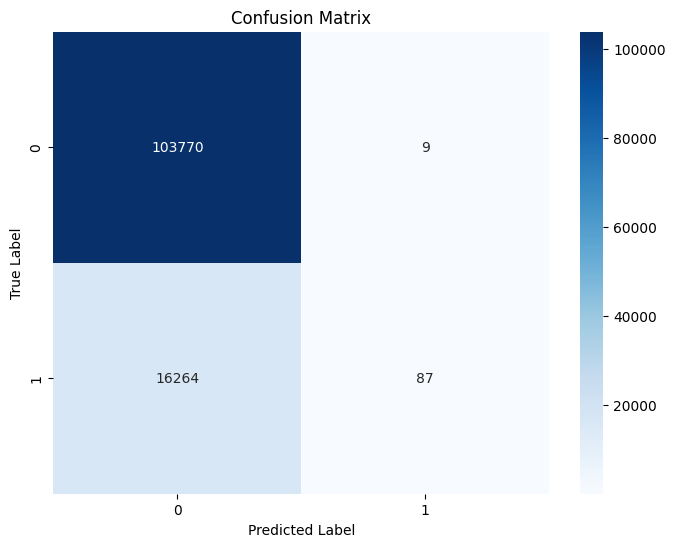


Random Forest Model Insights:
1. Overall model accuracy: 0.8645


In [10]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print insights
print("\nRandom Forest Model Insights:")
print(f"1. Overall model accuracy: {accuracy_score(y_test, y_pred):.4f}")